In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

## Valence, Arousal, and Dominance Means for Certain English Words

In [3]:
def get_mood():
    
    df = pd.read_csv('./Ratings_Warriner_et_al.csv', index_col=0)
    df = df[['Word','V.Mean.Sum', 'A.Mean.Sum','D.Mean.Sum']]
  
    df.columns=['word', 'valence', 'arousal', 'dominance']
    df.set_index('word',inplace=True)
    words = df.to_dict('index')

    return df, words

mood_df, words = get_mood()

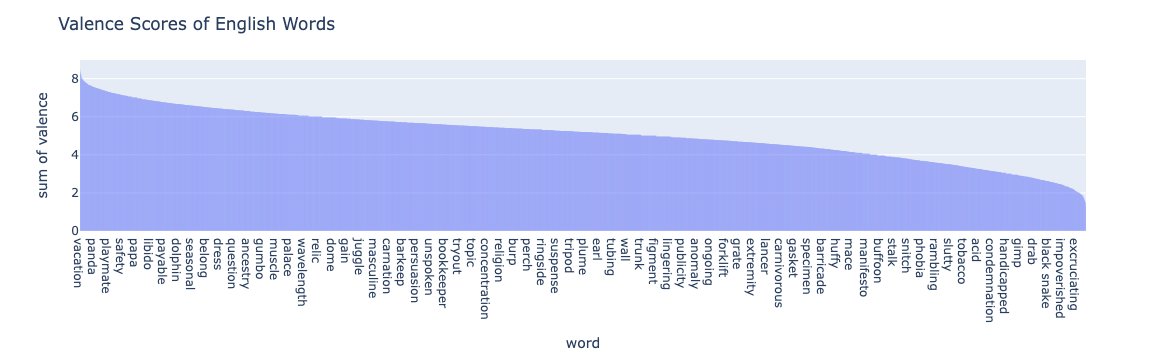

In [5]:
import plotly.express as px

valence_df = mood_df.sort_values(by=['valence'], ascending = False)
fig = px.histogram(valence_df, x=valence_df.index, y = 'valence')
fig.update_layout(
    title={
        'text': 'Valence Scores of English Words',
    })
fig.show()

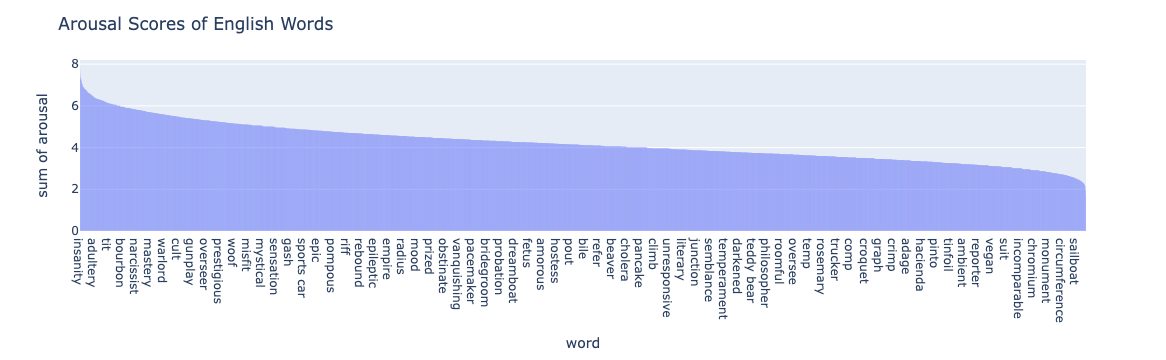

In [18]:
arousal_df = mood_df.sort_values(by=['arousal'], ascending = False)
fig = px.histogram(arousal_df, x=arousal_df.index, y = 'arousal')
fig.update_layout(
    title={
        'text': 'Arousal Scores of English Words',
    })
fig.show()

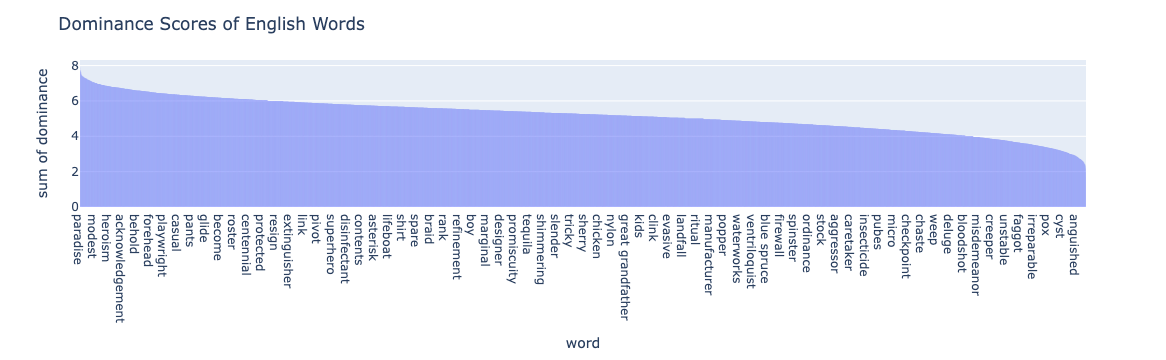

In [11]:
dominance_df = mood_df.sort_values(by=['dominance'], ascending = False)
fig = px.histogram(dominance_df, x=dominance_df.index, y = 'dominance')
fig.update_layout(
    title={
        'text': 'Dominance Scores of English Words',
    })
fig.show()

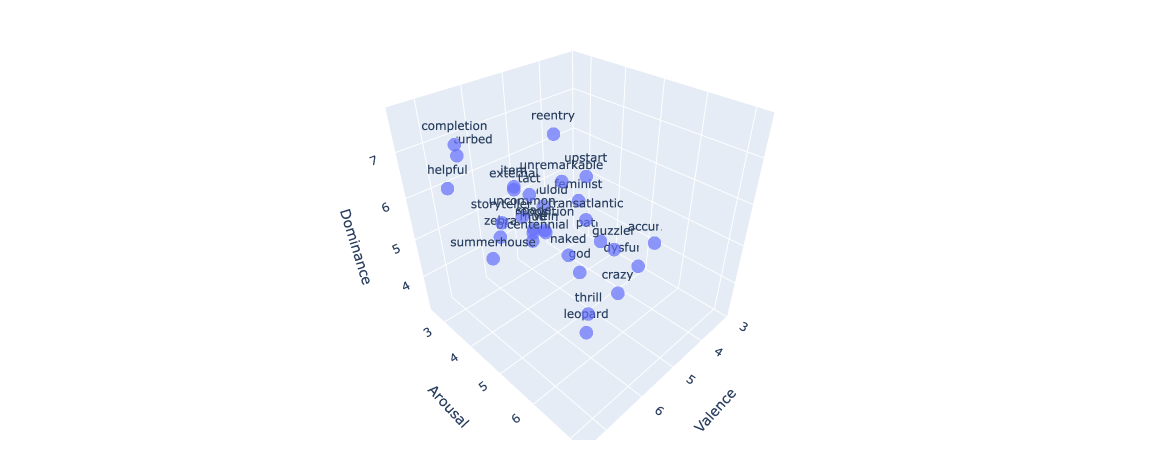

In [6]:
import plotly.express as px
from matplotlib import pyplot as plt
mdf = mood_df.sample(n=30)
df = px.data.iris()
x = mdf['valence']
y = mdf['arousal']
z = mdf['dominance']
fig = px.scatter_3d(df, x=x, y=y, z=z, text=mdf.index, opacity=0.7)
fig.update_layout(
    autosize=False,
    scene = dict(
        xaxis_title='Valence',
        yaxis_title='Arousal',
        zaxis_title='Dominance'),
        width=700,
        margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [7]:
import pickle
pickle.dump(fig, open('../img/moodplot.fig.pickle', 'wb')) 

## Valence, Arousal, and Dominance for Playlist Songs 

In [8]:
lyrics_df = pd.read_csv('../playlists/spotifyTopHits.csv')

def get_valence_arousal_dominance(row):
    
    lyric = row['lyrics_filtered']
    
    if lyric == 'Error: No lyrics found':
        row['valence_lyrics'] = None
        row['arousal_lyrics'] = None 
        row['dominance_lyrics'] = None
        return row
    
    lyric = lyric.split(' ')
    
    # remove duplicate words
    lyric = list(dict.fromkeys(lyric))
    word_count = len(lyric)
    
    valence_sum = 0
    arousal_sum = 0
    dominance_sum = 0
    
    for word in lyric:
        if word in words:
            valence_sum += words[word]['valence']
            arousal_sum += words[word]['arousal']
            dominance_sum += words[word]['dominance']

    valence = valence_sum / word_count
    arousal = arousal_sum / word_count
    dominance = dominance_sum / word_count
    
    row['valence_lyrics'] = valence
    row['arousal_lyrics'] = arousal
    row['dominance_lyrics'] = dominance
    
    return row

lyrics_df = lyrics_df.apply(get_valence_arousal_dominance, axis=1)
lyrics_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,artist_uri,genres,lyrics,popularity,release_date,lyrics_filtered,genres_encoded,valence_lyrics,arousal_lyrics,dominance_lyrics
0,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,...,spotify:artist:6KImCVD70vtIoJWnq6nGn3,['pop'],"['[Intro]\nCome on, Harry, we wanna say goodni...",98.0,2022-03-31,come harry wanna say goodnight holdin' back gr...,[5518],3.002419,1.914355,2.787581
1,0.737,0.846,1,-4.510,0,0.2200,0.00614,0.000000,0.0486,0.546,...,spotify:artist:7jVv8c5Fj3E9VhNjxT4snq,"['lgbtq+ hip hop', 'pop']","['[Intro]\nOne, two, three, four\n\n[Verse 1]\...",97.0,2021-09-17,one two three four need boy cuddle night keep ...,"[3266, 5518]",3.191928,2.251325,3.000843
2,0.756,0.697,8,-6.377,1,0.0401,0.18200,0.000000,0.3330,0.956,...,spotify:artist:4nDoRrQiYLoBzwC5BhVJzF,"['dance pop', 'pop', 'post-teen pop']","[""[Verse 1: Camila Cabello]\nYou said you hate...",96.0,2022-03-04,said hated ocean surfin' said i'd love life so...,"[1326, 5518, 1824]",1.615400,1.267100,1.515000
3,0.604,0.741,2,-5.571,1,0.0475,0.17800,0.000035,0.4090,0.473,...,spotify:artist:1uNFoZAHBGtllmzznpCI3s,"['canadian pop', 'pop']","[""[Verse 1]\nYoungblood thinks there's always ...",89.0,2021-03-19,youngblood thinks there's always tomorrow miss...,"[1523, 5518]",2.662564,1.981026,2.487692
4,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,...,spotify:artist:4yvcSjfu4PC0CYQyLy4wSq,"['gauze pop', 'indietronica', 'shiver pop']","[""[Intro]\n(Last night, all I think about is y...",92.0,2020-08-07,last night think stop baby walk want baby thin...,"[4585, 4284, 2513]",3.190649,2.284416,3.030519
5,0.603,0.691,5,-5.805,1,0.0372,0.02480,0.000000,0.5830,0.577,...,spotify:artist:7n2wHs1TKAczGzO7Dd2rGr,"['canadian pop', 'dance pop', 'pop', 'viral pop']","[""[Verse 1]\nYou never know how good you have ...",87.0,2022-03-31,never know good oh starin' picture girl matter...,"[1523, 1326, 5518, 4066]",2.722041,1.850000,2.558367
6,0.345,0.612,7,-6.543,0,0.0608,0.23200,0.000000,0.1940,0.232,...,spotify:artist:2W8yFh0Ga6Yf3jiayVxwkE,"['pop', 'post-teen pop']","[""[Verse 1]\nI can't believe we're finally alo...",96.0,2022-02-11,can't believe we're finally alone can't believ...,"[5518, 1824]",2.514667,1.799833,2.298667
7,0.728,0.783,11,-4.424,0,0.2660,0.23700,0.000000,0.4340,0.555,...,spotify:artist:53XhwfbYqKCa1cC15pYq2q,"['modern rock', 'rock']",['[Intro: Dan Reynolds]\nLook out for yourself...,98.0,2021-10-28,look wake sounds silence allows mind run aroun...,"[3530, 1323]",2.714516,2.078226,2.724032
8,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.002940,0.1170,0.881,...,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,"['dance pop', 'pop']","['[Intro]\nHey, woman\nHey, woman\n\n[Chorus]\...",97.0,2021-06-25,hey woman hey woman woman let woman woman woma...,"[1326, 5518]",3.502403,2.406124,3.257287
9,0.813,0.733,4,-5.417,0,0.0847,0.15000,0.001860,0.0909,0.397,...,spotify:artist:7FNnA9vBm6EKceENgCGRMb,"['funk carioca', 'funk pop', 'pagode baiano', ...","['[Letra de ""Envolver""]\n\n[Intro]\nDime cómo ...",98.0,2021-11-11,"[letra de ""envolver""] dime cómo hacemos si tú ...","[1711, 1859, 798, 5814]",0.263265,0.189082,0.261531


## Lyrics and audio features

In [10]:
import matplotlib.pyplot as plt
from scipy import stats

lyrics_df = lyrics_df.dropna()
lyrics_df = lyrics_df[lyrics_df['valence_lyrics'] > 0.5]
lyrics_df = lyrics_df[lyrics_df['arousal_lyrics'] > 0.5]
lyrics_df = lyrics_df[lyrics_df['dominance_lyrics'] > 0.5]
x_vars = list(lyrics_df.select_dtypes('number'))

### Valence against Audio Features

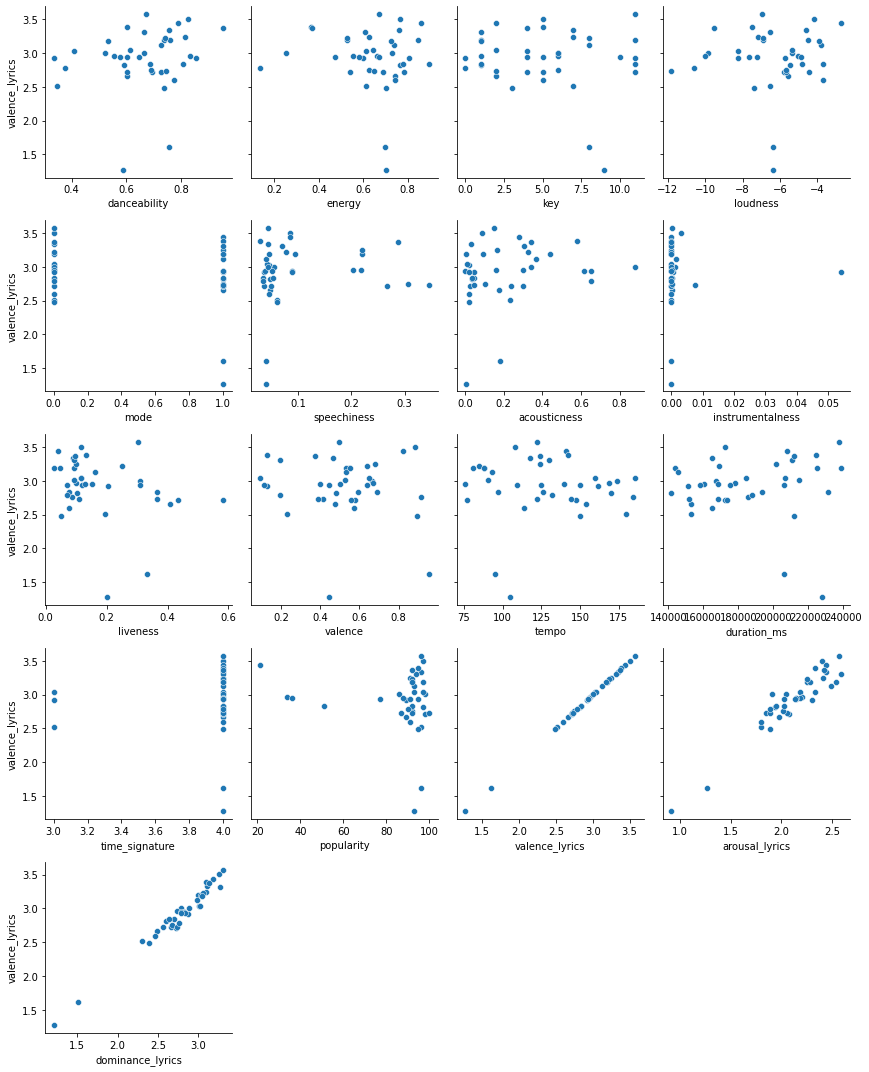

In [12]:
import seaborn as sns

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="valence_lyrics", ax=ax)
g.tight_layout()
plt.savefig('../img/valence_grid.png')

### Arousal against Audio Features

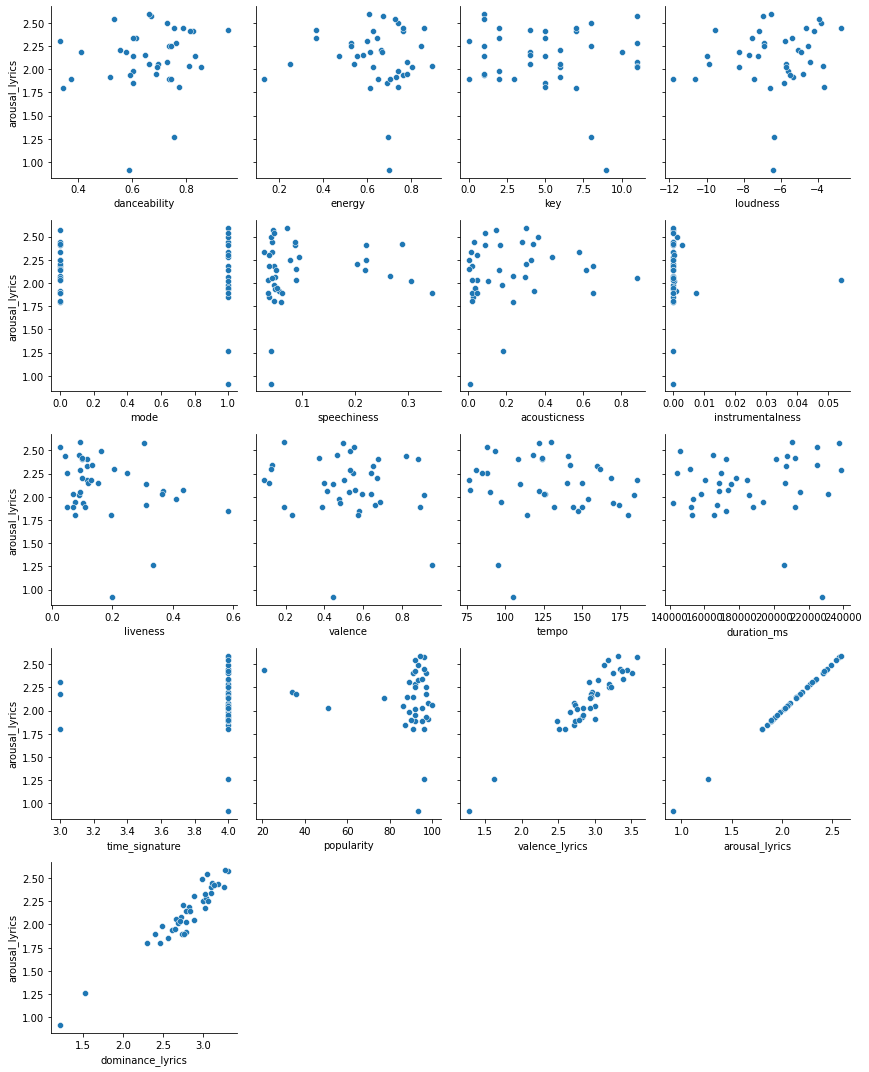

In [13]:
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="arousal_lyrics", ax=ax)
g.tight_layout()

### Dominance against Audio Features

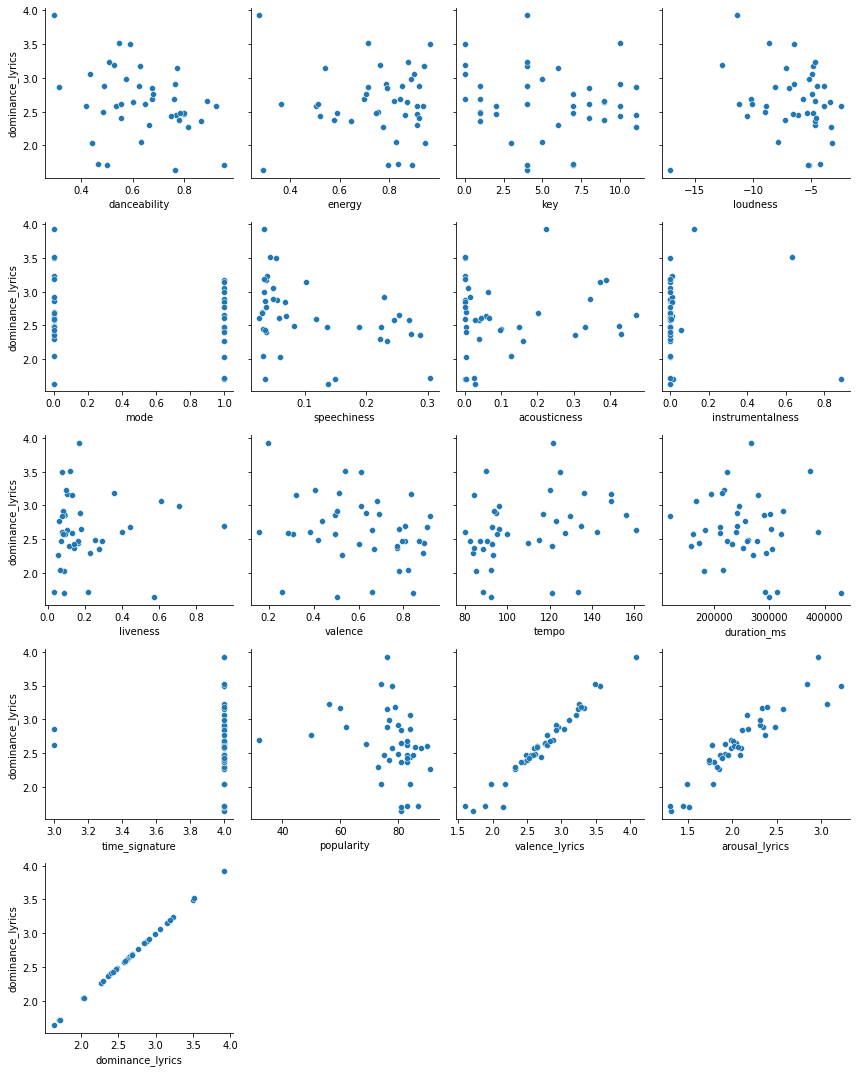

In [54]:
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="dominance_lyrics", ax=ax)
g.tight_layout()

### P-values between valence/arousal/dominance and audio features

In [14]:
def spearmanr_pval(x,y):
        return stats.spearmanr(x,y)[1]

spearman_pvalue = lyrics_df.corr(method=spearmanr_pval)
spearman_pvalue = spearman_pvalue.loc[['valence_lyrics', 'arousal_lyrics', 'dominance_lyrics']]
spearman_pvalue

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,valence_lyrics,arousal_lyrics,dominance_lyrics
valence_lyrics,0.147611,0.476165,0.960264,0.824746,0.422464,0.390503,0.118002,0.343797,0.086648,0.861134,0.274613,0.146584,0.436529,0.894909,1.000000e+00,5.383966e-14,1.743511e-22
arousal_lyrics,0.282344,0.578312,0.800339,0.316137,0.956076,0.552885,0.186623,0.370017,0.205395,0.546350,0.177482,0.197850,0.717412,0.938299,5.383966e-14,1.000000e+00,5.610672e-16
dominance_lyrics,0.188062,0.243100,0.899649,0.835246,0.525334,0.429969,0.111199,0.307326,0.107309,0.475040,0.204539,0.122604,0.717412,0.928529,1.743511e-22,5.610672e-16,1.000000e+00


### Correlation Coefficient between valence/arousal/dominance and audio features

In [16]:
spearman_corr = lyrics_df.corr(method='spearman')
spearman_corr = spearman_corr.loc[['valence_lyrics', 'arousal_lyrics', 'dominance_lyrics']]
spearman_corr.to_csv("../img/spearman_corr")
spearman_corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,valence_lyrics,arousal_lyrics,dominance_lyrics
valence_lyrics,0.236259,-0.117516,-0.008246,0.036640,-0.132183,0.141411,0.254453,0.155731,-0.277963,-0.028947,-0.179352,0.236842,0.128247,0.021861,1.000000,0.887247,0.962146
arousal_lyrics,0.176536,-0.091806,-0.041841,0.164777,0.009116,0.097986,0.215992,0.147558,-0.207308,-0.099595,-0.220445,0.210729,0.059849,-0.012812,0.887247,1.000000,0.912955
dominance_lyrics,0.215305,-0.191406,-0.020870,-0.034413,-0.104835,0.130074,0.259109,0.167763,-0.261869,-0.117814,-0.207692,0.251417,0.059849,0.014845,0.962146,0.912955,1.000000


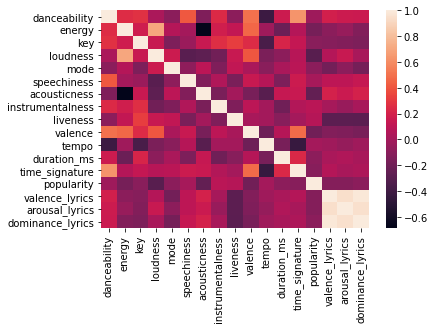

In [17]:
import seaborn as sn
corrMatrix = lyrics_df.corr()
sn.heatmap(corrMatrix)
plt.show()